In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Configuración del navegador
chrome_options = Options()
chrome_options.add_argument("start-maximized")
chrome_options.add_argument("__headless")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36")

# Inicializar el driver
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=chrome_options
)

# Función para extraer el precio de una habitación de Airbnb
def scrape_airbnb_price(room_url):
    driver.get(room_url)
    
    try:
        # Esperar hasta que el precio esté presente en la página
        WebDriverWait(driver, 20).until(
            EC.visibility_of_element_located((By.XPATH, '//span[@data-testid="price-string"]'))
        )
        
        # Extraer el precio
        price_element = driver.find_element(By.XPATH, '//span[@data-testid="price-string"]')
        price = price_element.text
        
        # Crear un DataFrame con el precio
        df = pd.DataFrame({'URL': [room_url], 'Precio': [price]})
        
        return df

    except TimeoutException:
        print("No se pudo encontrar el precio en la página.")
        return pd.DataFrame({'URL': [room_url], 'Precio': [None]})
    
    finally:
        driver.quit()  # Cerrar el navegador después de completar el scraping

# URL de la habitación
room_url = 'https://www.airbnb.es/rooms/1256710601590914950?source_impression_id=p3_1727778558_P3aQUfjhWV_j4wpp'

# Ejecutar la función y obtener el precio en un DataFrame
df_price = scrape_airbnb_price(room_url)

# Mostrar el DataFrame
print(df_price)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=129.0.6668.71)
Stacktrace:
	GetHandleVerifier [0x003A7143+25587]
	(No symbol) [0x0033A2E4]
	(No symbol) [0x00232113]
	(No symbol) [0x0020E23B]
	(No symbol) [0x002A179F]
	(No symbol) [0x002B4CB9]
	(No symbol) [0x0029A936]
	(No symbol) [0x0026BA73]
	(No symbol) [0x0026C4CD]
	GetHandleVerifier [0x00684C63+3030803]
	GetHandleVerifier [0x006D6B99+3366473]
	GetHandleVerifier [0x004395F2+624802]
	GetHandleVerifier [0x00440E6C+655644]
	(No symbol) [0x00342C9D]
	(No symbol) [0x0033FD68]
	(No symbol) [0x0033FF05]
	(No symbol) [0x00332336]
	BaseThreadInitThunk [0x753CFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x76FF80CE+286]
	RtlGetAppContainerNamedObjectPath [0x76FF809E+238]


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Configuración del navegador
chrome_options = Options()
chrome_options.add_argument("start-maximized")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36")

# Inicializar el driver
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=chrome_options
)

# Función para cerrar la barra de traducción de Google Chrome si aparece
def close_translation_popup():
    try:
        # Espera a que aparezca el botón de cerrar de la barra de traducción (X)
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@aria-label="Don’t translate"]'))
        ).click()
        print("Barra de traducción cerrada.")
    except TimeoutException:
        print("No se encontró la barra de traducción.")

# Función para extraer el precio de una habitación de Airbnb
def scrape_airbnb_price(room_url):
    driver.get(room_url)
    
    # Intentar cerrar la barra de traducción si aparece
    close_translation_popup()
    
    try:
        # Esperar hasta que el precio esté presente en la página
        WebDriverWait(driver, 20).until(
            EC.visibility_of_element_located((By.XPATH, '//span[@data-testid="price-string"]'))
        )
        
        # Extraer el precio
        price_element = driver.find_element(By.XPATH, '//span[@data-testid="price-string"]')
        price = price_element.text
        
        # Crear un DataFrame con el precio
        df = pd.DataFrame({'URL': [room_url], 'Precio': [price]})
        
        return df

    except TimeoutException:
        print("No se pudo encontrar el precio en la página.")
        return pd.DataFrame({'URL': [room_url], 'Precio': [None]})
    
    finally:
        driver.quit()  # Cerrar el navegador después de completar el scraping

# URL de la habitación
room_url = 'https://www.airbnb.com/rooms/5413930?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&search_mode=regular_search&check_in=2024-12-04&check_out=2024-12-09&source_impression_id=p3_1727425011_P3toaJxneSLX1aej&previous_page_section_name=1000&federated_search_id=f573770f-c781-45af-a464-dd123435c95f'

# Ejecutar la función y obtener el precio en un DataFrame
df_price = scrape_airbnb_price(room_url)

# Mostrar el DataFrame
print(df_price)


No se encontró la barra de traducción.
No se pudo encontrar el precio en la página.
                                                 URL Precio
0  https://www.airbnb.com/rooms/5413930?adults=1&...   None


In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración del navegador
chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36")

# Iniciar el navegador
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL de la propiedad
url = 'https://www.airbnb.es/rooms/1256710601590914950?source_impression_id=p3_1727778558_P3aQUfjhWV_j4wpp'

# Abre la página de la propiedad
driver.get(url)

# Esperar a que la página cargue completamente
try:
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    
    # Si aparece la ventana de traducción, hacer clic en la 'X'
    try:
        close_translation = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@aria-label="Cerrar"]'))
        )
        close_translation.click()
    except Exception as e:
        print("No se encontró la ventana de traducción o ya estaba cerrada:", e)

    # Esperar a que el precio esté visible en la página (aumentamos el tiempo de espera)
    price_element = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.XPATH, '//span[contains(@data-testid, "price-string")]'))
    )
    price_text = price_element.text

except Exception as e:
    print(f"No se pudo obtener el precio: {e}")
    price_text = "N/A"

# Crear un DataFrame con los resultados
df = pd.DataFrame({'URL': [url], 'Precio': [price_text]})

# Cerrar el navegador
driver.quit()

# Mostrar el DataFrame
print(df)



No se pudo obtener el precio: Message: 
Stacktrace:
	GetHandleVerifier [0x00BC6AB3+25587]
	(No symbol) [0x00B59C54]
	(No symbol) [0x00A52113]
	(No symbol) [0x00A96F62]
	(No symbol) [0x00A971AB]
	(No symbol) [0x00AD7852]
	(No symbol) [0x00ABABE4]
	(No symbol) [0x00AD5370]
	(No symbol) [0x00ABA936]
	(No symbol) [0x00A8BA73]
	(No symbol) [0x00A8C4CD]
	GetHandleVerifier [0x00EA4C63+3032483]
	GetHandleVerifier [0x00EF6B99+3368153]
	GetHandleVerifier [0x00C58F62+624802]
	GetHandleVerifier [0x00C607DC+655644]
	(No symbol) [0x00B6260D]
	(No symbol) [0x00B5F6D8]
	(No symbol) [0x00B5F875]
	(No symbol) [0x00B51CA6]
	BaseThreadInitThunk [0x753CFCC9+25]
	RtlGetAppContainerNamedObjectPath [0x76FF80CE+286]
	RtlGetAppContainerNamedObjectPath [0x76FF809E+238]

                                                 URL Precio
0  https://www.airbnb.es/rooms/125671060159091495...    N/A


In [4]:
# Leer el archivo CSV (asegúrate de reemplazar 'ruta_del_archivo.csv' con la ruta real de tu archivo)
df = pd.read_csv('SanFrancisco1.csv')

# Mostrar el DataFrame
print(df)

     Unnamed: 0  guest_favorite   rating  number_reviews  type_host  \
0             0            True     4.94              67  Superhost   
1             1            True     4.98              48  Superhost   
2             2            True     4.95             112  Superhost   
3             3            True     4.97              62  Superhost   
4             4           False  reviews             107        NaN   
..          ...             ...      ...             ...        ...   
265         265           False  reviews             129  Superhost   
266         266            True     4.91              46  Superhost   
267         267           False      NaN               0   new_host   
268         268           False  reviews             114  Superhost   
269         269            True     4.94             247  Superhost   

            hosting_time            price  \
0      · 2 years hosting  € 178 per night   
1     · 10 years hosting              NaN   
2      · 9 y

VISUALIZACION

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

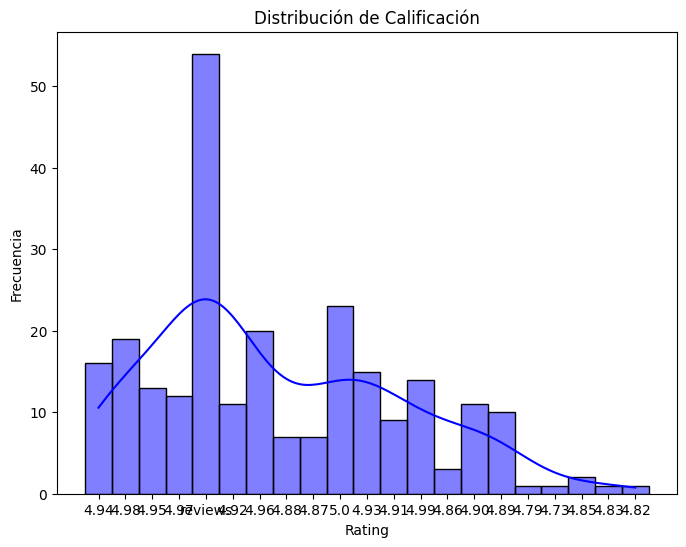

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Distribución de Calificación')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

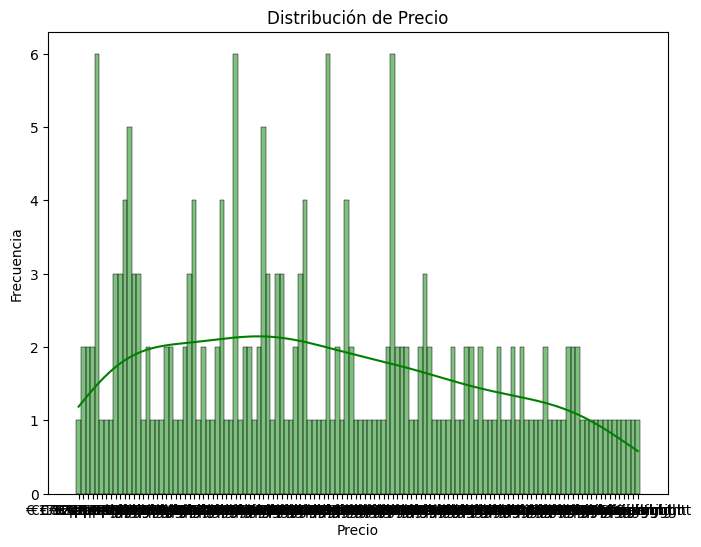

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='green')
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

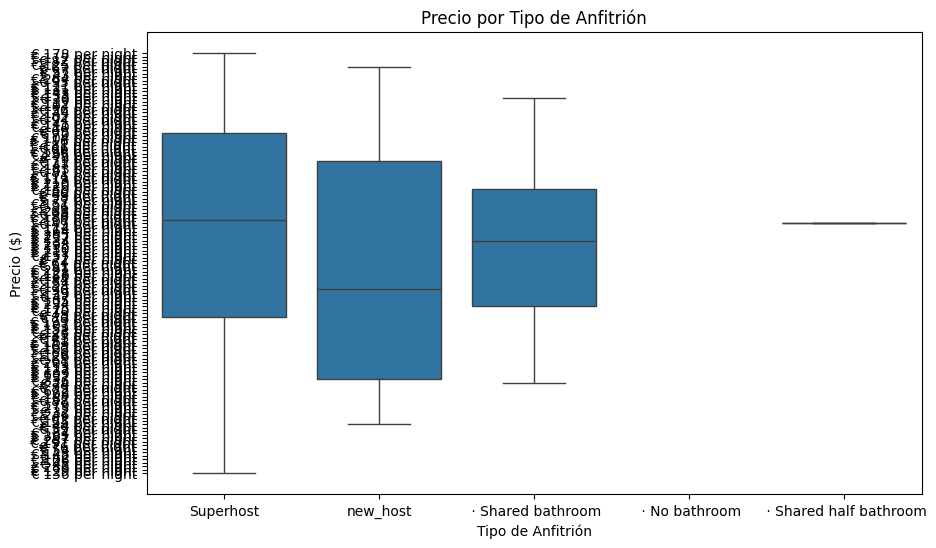

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='price', data=df)
plt.title('Precio por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Precio ($)')
plt.show()

C:\Users\stehu\AppData\Local\Temp\ipykernel_20484\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


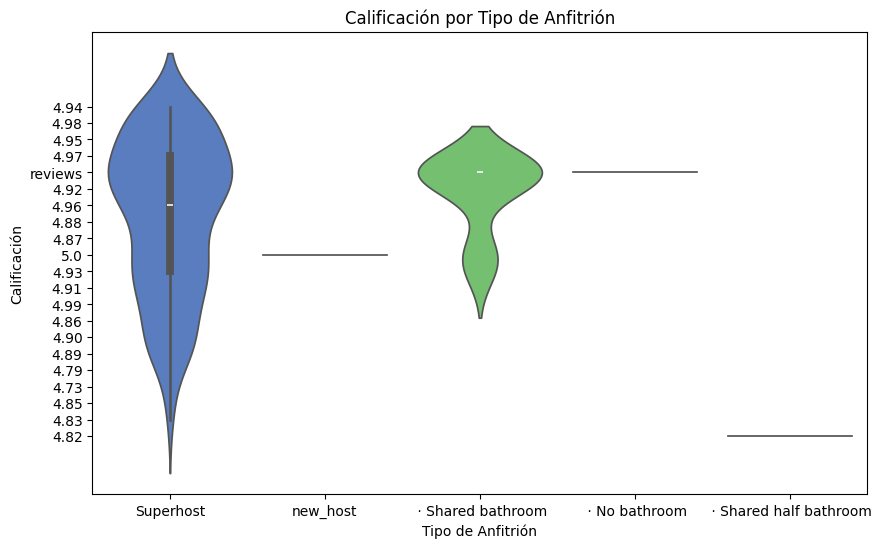

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

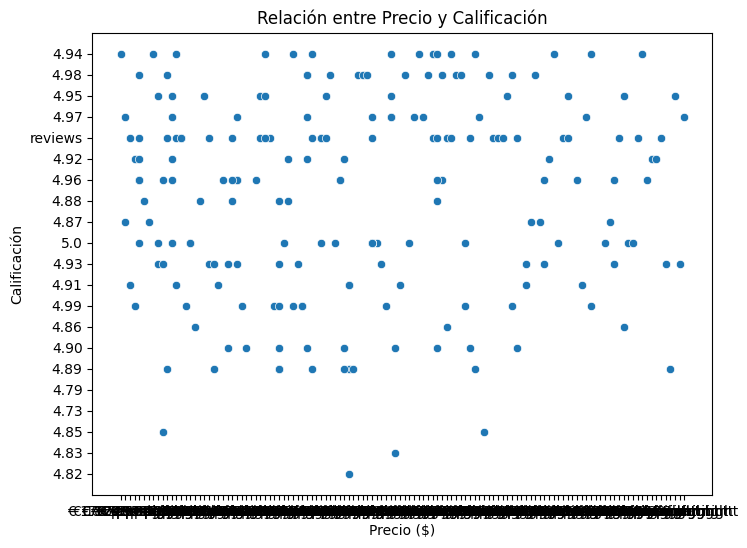

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()


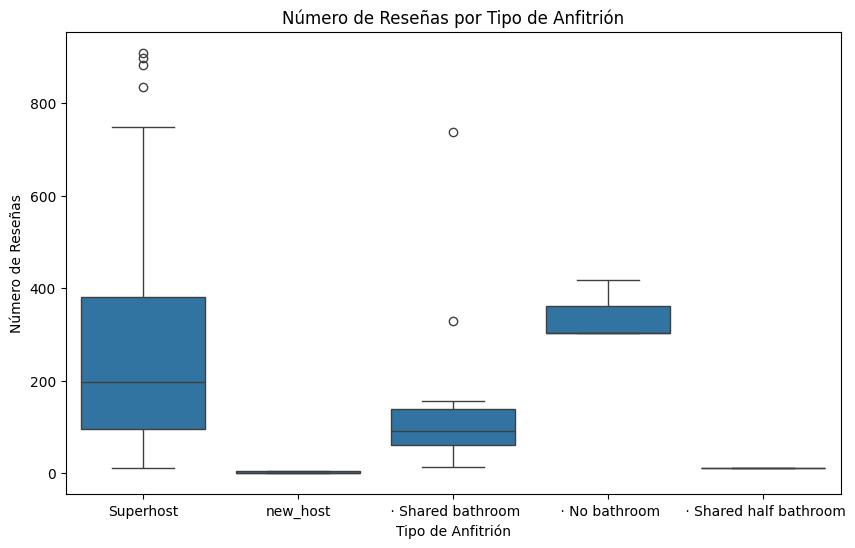

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='number_reviews', data=df)
plt.title('Número de Reseñas por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Número de Reseñas')
plt.show()


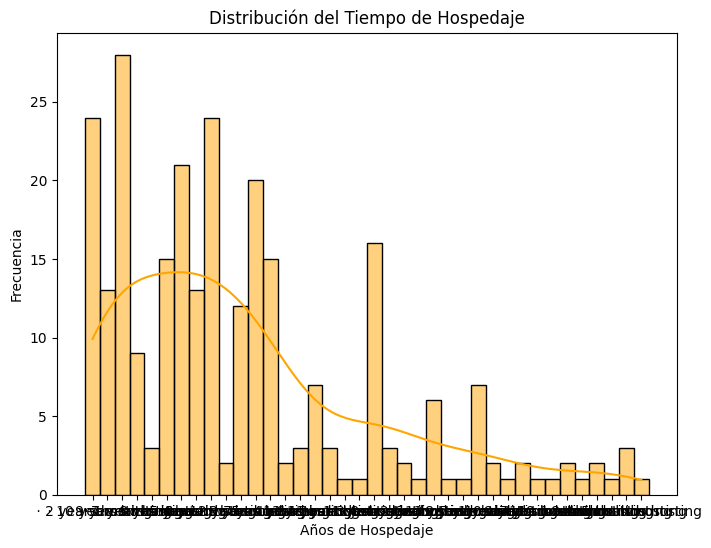

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['hosting_time'], kde=True, bins=20, color='orange')
plt.title('Distribución del Tiempo de Hospedaje')
plt.xlabel('Años de Hospedaje')
plt.ylabel('Frecuencia')
plt.show()


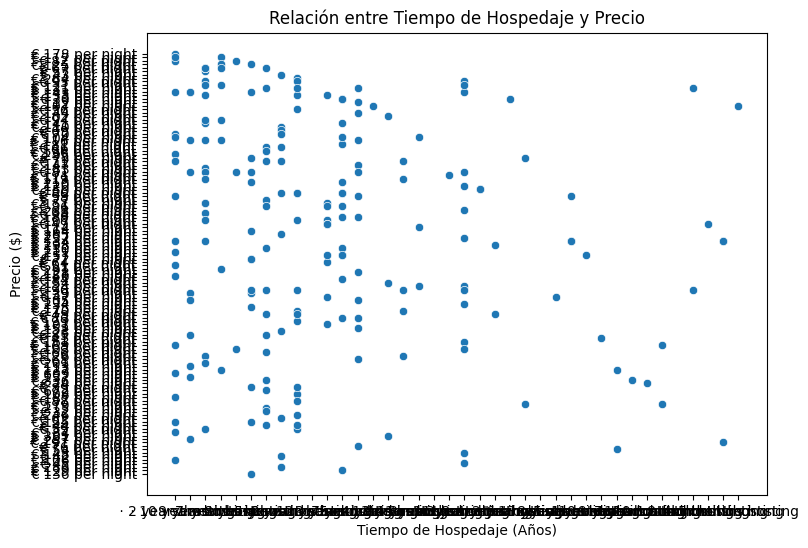

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hosting_time', y='price', data=df)
plt.title('Relación entre Tiempo de Hospedaje y Precio')
plt.xlabel('Tiempo de Hospedaje (Años)')
plt.ylabel('Precio ($)')
plt.show()


In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", axis=1)
plt.title('Mapa de Calor de Correlación')
plt.show()


ValueError: could not convert string to float: 'reviews'

<Figure size 1000x600 with 0 Axes>

C:\Users\stehu\AppData\Local\Temp\ipykernel_20484\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


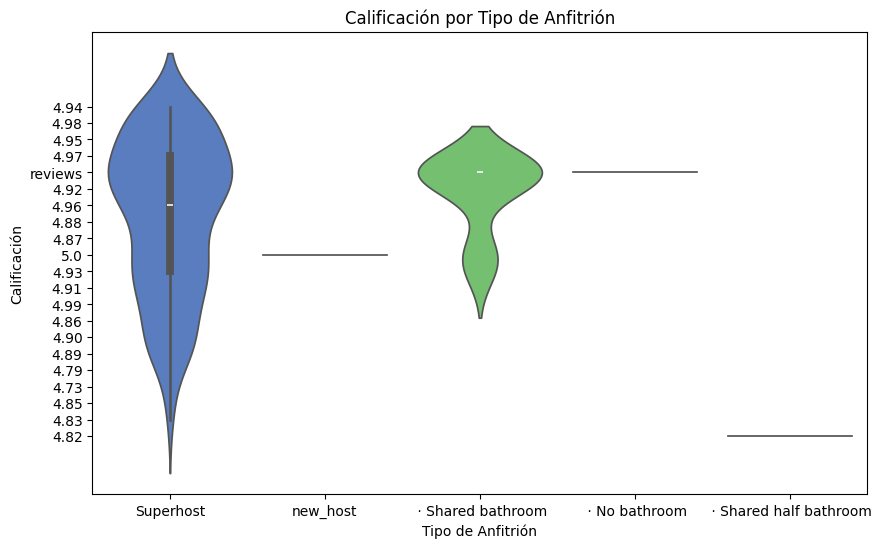

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

In [26]:
plt.figure(figsize=(8, 6))
df['rating_group'] = pd.cut(df['rating'], bins=[0, 3, 4, 5], labels=['Baja', 'Media', 'Alta'])
sns.boxplot(x='rating_group', y='price', data=df)
plt.title('Precio por Grupo de Calificación')
plt.xlabel('Grupo de Calificación')
plt.ylabel('Precio ($)')
plt.show()


TypeError: '<' not supported between instances of 'int' and 'str'

<Figure size 800x600 with 0 Axes>

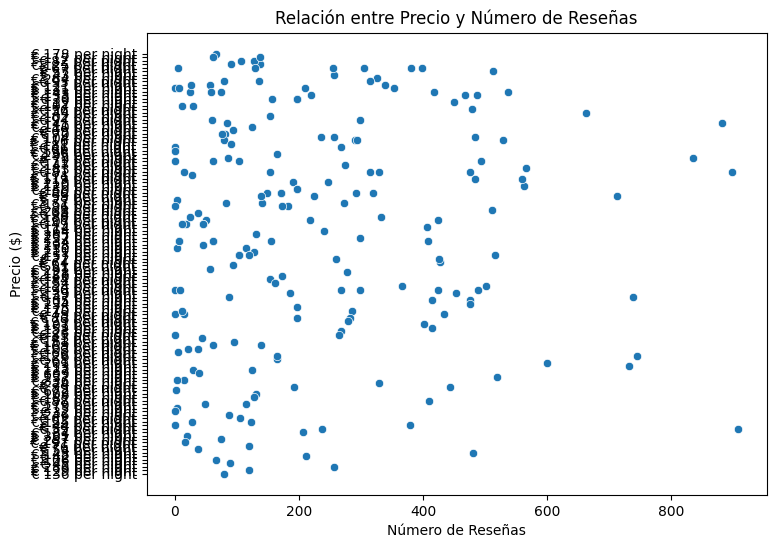

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_reviews', y='price', data=df)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.show()


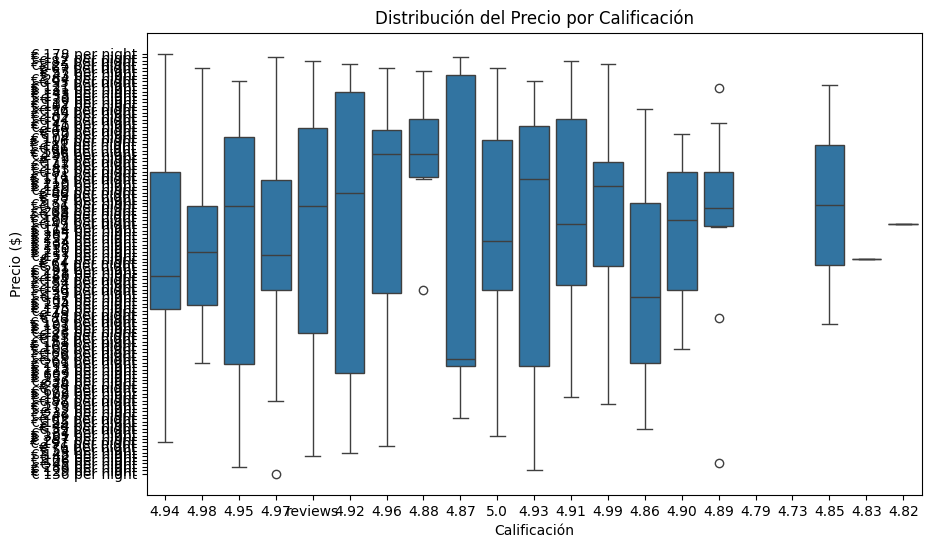

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price', data=df)
plt.title('Distribución del Precio por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Precio ($)')
plt.show()


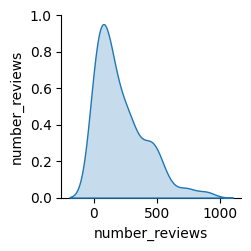

In [31]:
sns.pairplot(df[['price', 'rating', 'number_reviews', 'hosting_time']], diag_kind='kde')
plt.show()


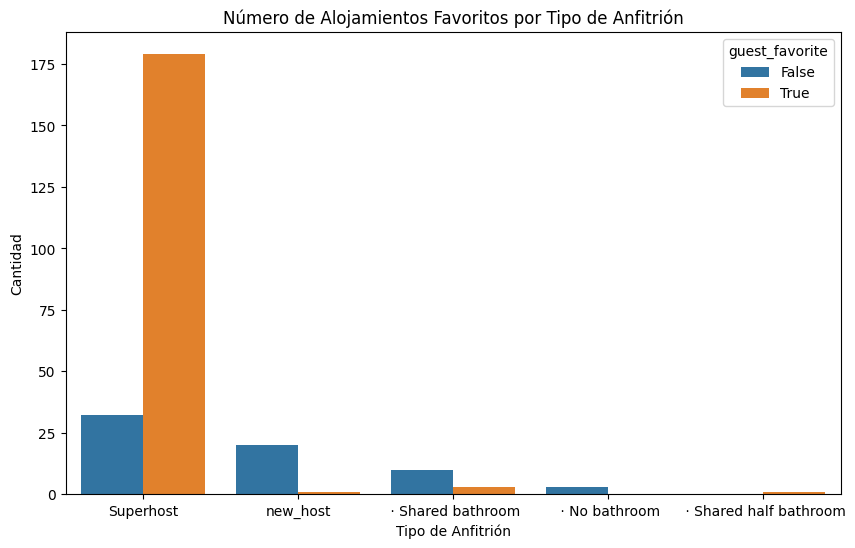

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_host', hue='guest_favorite', data=df)
plt.title('Número de Alojamientos Favoritos por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Cantidad')
plt.show()


DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

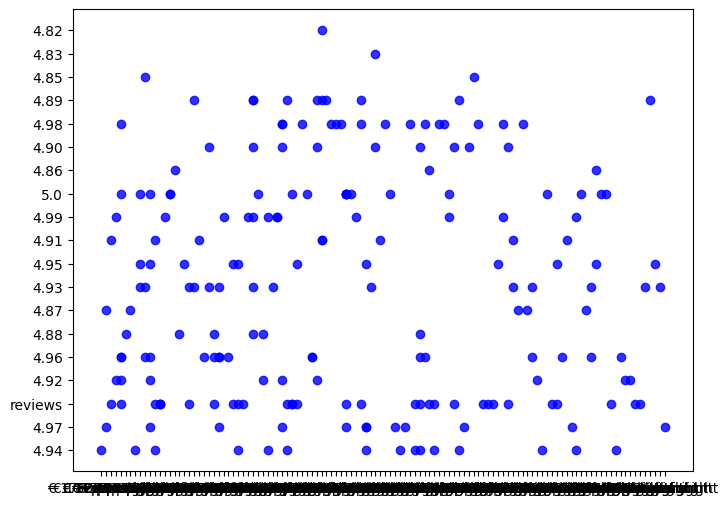

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='rating', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relación entre Precio y Calificación con Línea de Regresión')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()


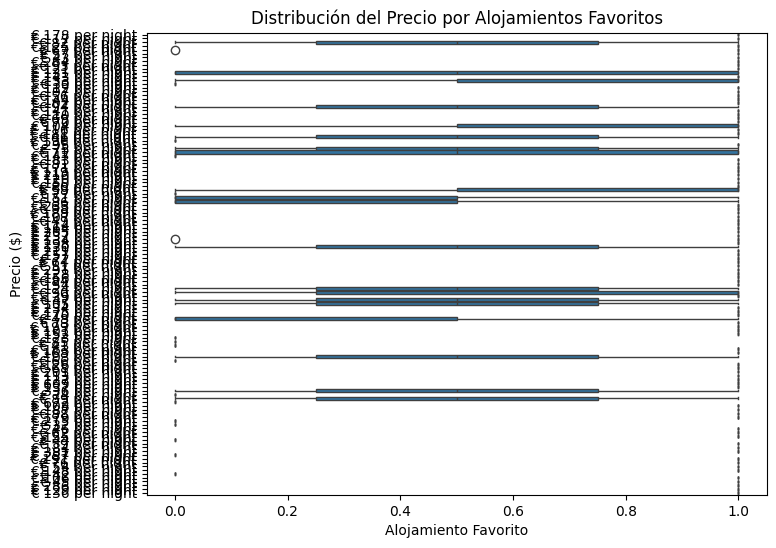

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='guest_favorite', y='price', data=df)
plt.title('Distribución del Precio por Alojamientos Favoritos')
plt.xlabel('Alojamiento Favorito')
plt.ylabel('Precio ($)')
plt.show()


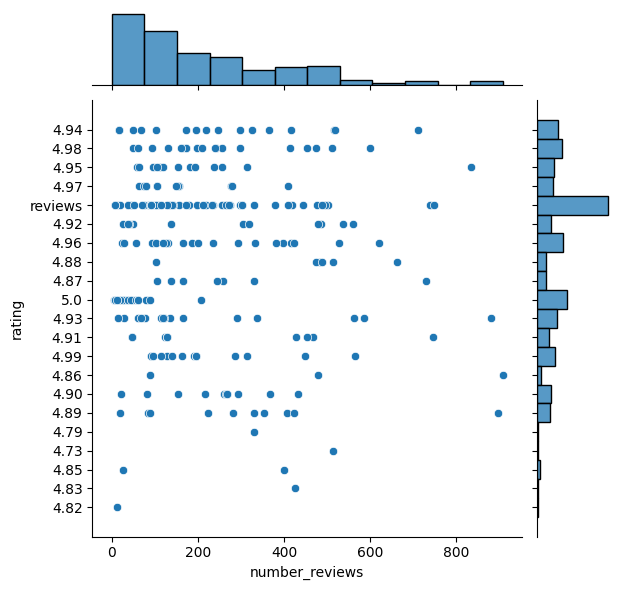

In [39]:
sns.jointplot(x='number_reviews', y='rating', data=df, kind='scatter')
plt.show()


TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

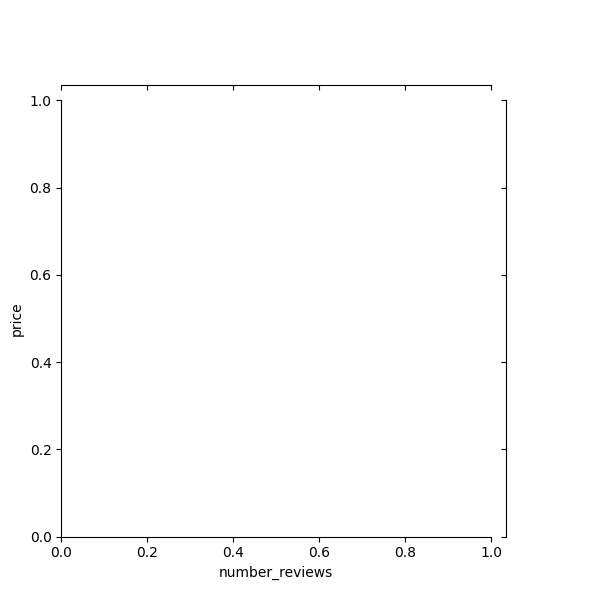

In [41]:
sns.jointplot(x='number_reviews', y='price', data=df, kind='kde', fill=True)
plt.title('Distribución Conjunta de Reseñas y Precio')
plt.show()


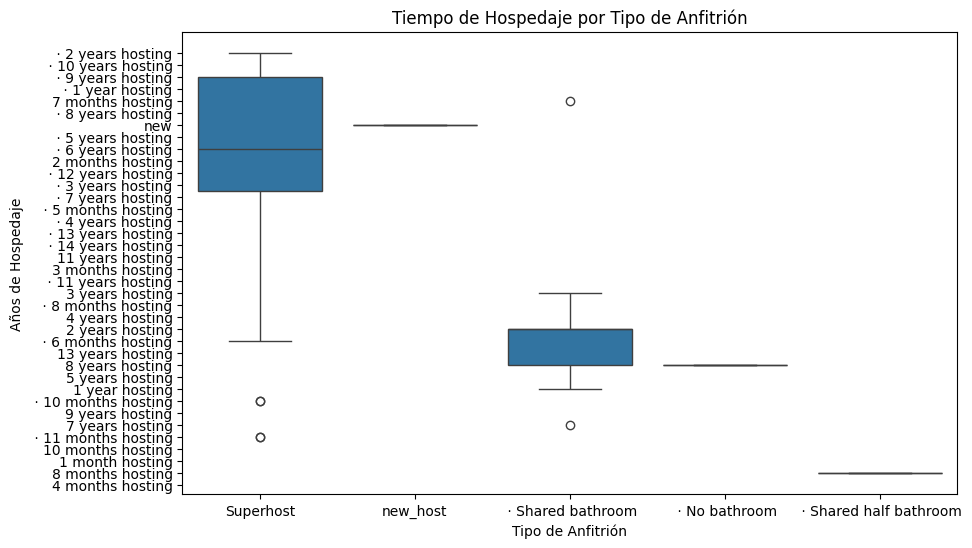

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='hosting_time', data=df)
plt.title('Tiempo de Hospedaje por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Años de Hospedaje')
plt.show()


In [23]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('sanfrancisco1.csv')

# Asegúrate de que las columnas se han limpiado como esperabas
df['price_cleaned'] = ...  # Asegúrate de tener esta columna definida
df['hosting_time_cleaned'] = ...  # Asegúrate de tener esta columna definida

# Ahora puedes generar la matriz de correlación
numeric_cols = ['rating', 'number_reviews', 'hosting_time_cleaned', 'price_cleaned']
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


ValueError: could not convert string to float: 'reviews'

In [21]:
# Limpiar la columna 'price' extrayendo solo el número
df['price_cleaned'] = df['price'].str.extract(r'(\d+)').astype(float)

# Verificar los primeros valores para confirmar la limpieza
print(df[['price', 'price_cleaned']].head())


Empty DataFrame
Columns: [price, price_cleaned]
Index: []


In [29]:
import re

# Función para convertir hosting_time a meses
def convert_to_months(hosting_time):
    # Buscar "years" y convertir a meses
    years_match = re.search(r'(\d+)\s+years', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    years_match = re.search(r'(\d+)\s+year', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    # Buscar "months" y dejar en meses
    months_match = re.search(r'(\d+)\s+months', hosting_time)
    if months_match:
        months = int(months_match.group(1))
        return months
    
    # Buscar "days" y convertir a meses (aprox. 30 días = 1 mes)
    days_match = re.search(r'(\d+)\s+days', hosting_time)
    if days_match:
        days = int(days_match.group(1))
        return days / 30  # Convertir días a meses
    
    return 0  # Si no hay coincidencia, devolver 0 meses

# Aplicar la función a la columna 'hosting_time'
df['hosting_time_cleaned'] = df['hosting_time'].apply(convert_to_months)

# Visualizar los primeros valores
print(df[['hosting_time', 'hosting_time_cleaned']].head())



          hosting_time  hosting_time_cleaned
0    · 2 years hosting                    24
1   · 10 years hosting                   120
2    · 9 years hosting                   108
3     · 1 year hosting                    12
4     7 months hosting                     7


C:\Users\stehu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\stehu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


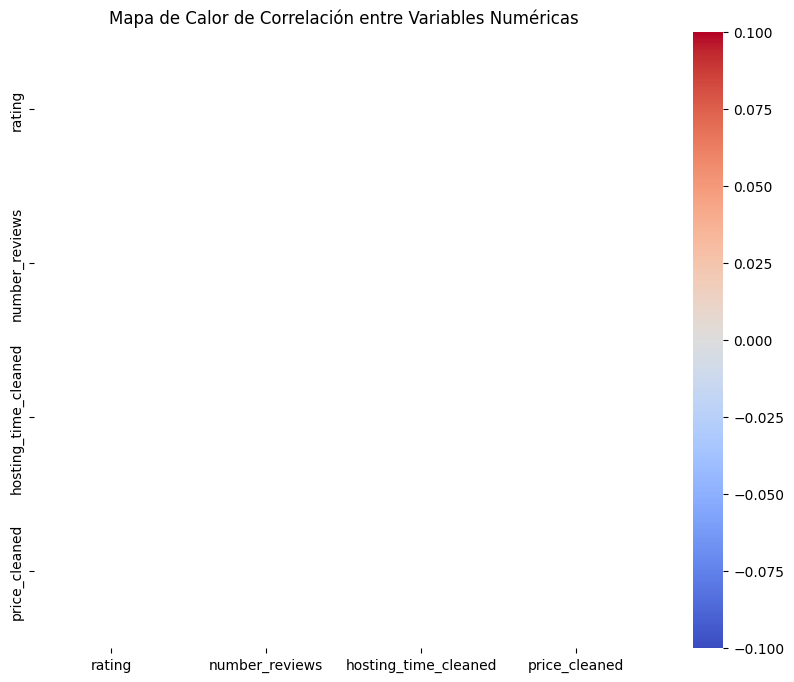

In [ ]:
# Verificar si las columnas numéricas contienen valores no numéricos
for col in numeric_cols:
    non_numeric = df[~df[col].apply(lambda x: isinstance(x, (int, float)))]
    if len(non_numeric) > 0:
        print(f"Valores no numéricos encontrados en la columna {col}:")
        print(non_numeric.head())

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con NaN en las columnas numéricas
df = df.dropna(subset=numeric_cols)

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


In [27]:
# Seleccionar las columnas numéricas para el análisis de correlación
numeric_cols = ['rating', 'number_reviews', 'hosting_time_cleaned', 'price_cleaned']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')

# Mostrar el gráfico
plt.show()


ValueError: could not convert string to float: 'reviews'